## Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importe y limpieza de datos

In [2]:
df = pd.read_excel('data/estadsticaspoliciales2023.xlsx')
df.head(5)

,Delito,SubDelito,Fecha,Hora,Victima,SubVictima,Edad,Genero,Nacionalidad,Provincia,Canton,Distrito
0,ASALTO,ARMA BLANCA,2023-10-31,21:00:00 - 23:59:59,PERSONA,OTRO O INDETERMINADO [PERSONA],Mayor de edad,HOMBRE,NICARAGUA,SAN JOSE,SAN JOSE,CATEDRAL
1,ASALTO,GOLPES,2023-10-31,21:00:00 - 23:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,HOMBRE,COSTA RICA,CARTAGO,PARAISO,PARAISO
2,ASALTO,ARMA BLANCA,2023-10-31,21:00:00 - 23:59:59,EDIFICACION,RESTAURANTE/SODA [EDIFICACION],Mayor de edad,HOMBRE,COSTA RICA,SAN JOSE,DESAMPARADOS,SAN JUAN DE DIOS
3,ASALTO,INTIMIDACION VERBAL,2023-10-31,21:00:00 - 23:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,HOMBRE,COSTA RICA,SAN JOSE,SAN JOSE,MATA REDONDA
4,ROBO,BOQUETE,2023-10-31,21:00:00 - 23:59:59,EDIFICACION,RESTAURANTE/SODA [EDIFICACION],Adulto Mayor,HOMBRE,COSTA RICA,HEREDIA,BARVA,SAN PEDRO


## EDA

In [3]:
df.columns

Index(['Delito', 'SubDelito', 'Fecha', 'Hora', 'Victima', 'SubVictima', 'Edad',
       'Genero', 'Nacionalidad', 'Provincia', 'Canton', 'Distrito'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41425 entries, 0 to 41424
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Delito        41425 non-null  object        
 1   SubDelito     41425 non-null  object        
 2   Fecha         41425 non-null  datetime64[ns]
 3   Hora          41425 non-null  object        
 4   Victima       41425 non-null  object        
 5   SubVictima    41425 non-null  object        
 6   Edad          41425 non-null  object        
 7   Genero        41425 non-null  object        
 8   Nacionalidad  41425 non-null  object        
 9   Provincia     41425 non-null  object        
 10  Canton        41425 non-null  object        
 11  Distrito      41425 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 3.8+ MB


In [5]:
print(f'''
      * Delitos: {df['Delito'].unique()}
      
--------------------------------------------------------------------------------
      
      * SubDelitos: {df['SubDelito'].unique()}
      
--------------------------------------------------------------------------------
      
      * Victimas: {df['Victima'].unique()}
      
--------------------------------------------------------------------------------
      
      * SubVictima: {df['SubVictima'].unique()}
      
--------------------------------------------------------------------------------
      
      * Edad: {df['Edad'].unique()}
      
--------------------------------------------------------------------------------
      
      * Nacionalidad: {df['Nacionalidad'].unique()}
      ''')


      * Delitos: ['ASALTO' 'ROBO' 'HOMICIDIO' 'HURTO' 'TACHA DE VEHICULO'
 'ROBO DE VEHICULO']
      
--------------------------------------------------------------------------------
      
      * SubDelitos: ['ARMA BLANCA' 'GOLPES' 'INTIMIDACION VERBAL' 'BOQUETE' 'CORTA CANDADOS'
 'AJUSTE DE CUENTAS/VENGANZA' 'POR CONFIANZA' 'ARMA DE FUEGO' 'FORZADURA'
 'TACHA DE VEHICULO' 'OTRO O INDETERMINADO' 'COCHERAZO' 'DESCUIDO'
 'ARREBATO' 'ESCALAMIENTO' 'CARTERISTA' 'ASALTO' 'POR DESCUIDO'
 'ARDID PREVIO/DISTRACCION' 'CON LLAVE' 'CANDADO CHINO' 'QUITAN CELOSIAS'
 'RUPTURA VENTANA' 'INMOVILIZACION' 'PROGRESIVOS' 'USO DE SOMNIFERO'
 'POR LA COMISION DE OTRO DELITO' 'RETIRO DE CAJERO AUTOMATICO'
 'ARMA CONTUNDENTE' 'GANZUA/VARILLA' 'FEMICIDIO' 'VIOLENCIA DOMESTICA'
 'DISCUSION/RIÑA' 'PROFESIONAL' 'NO DETERMINADO' 'ARDID PREVIO'
 'USO DE GAS' 'REPELIENDO ACTIVIDAD CRIMINAL' 'DESCONOCIDO']
      
--------------------------------------------------------------------------------
      
      * Victi

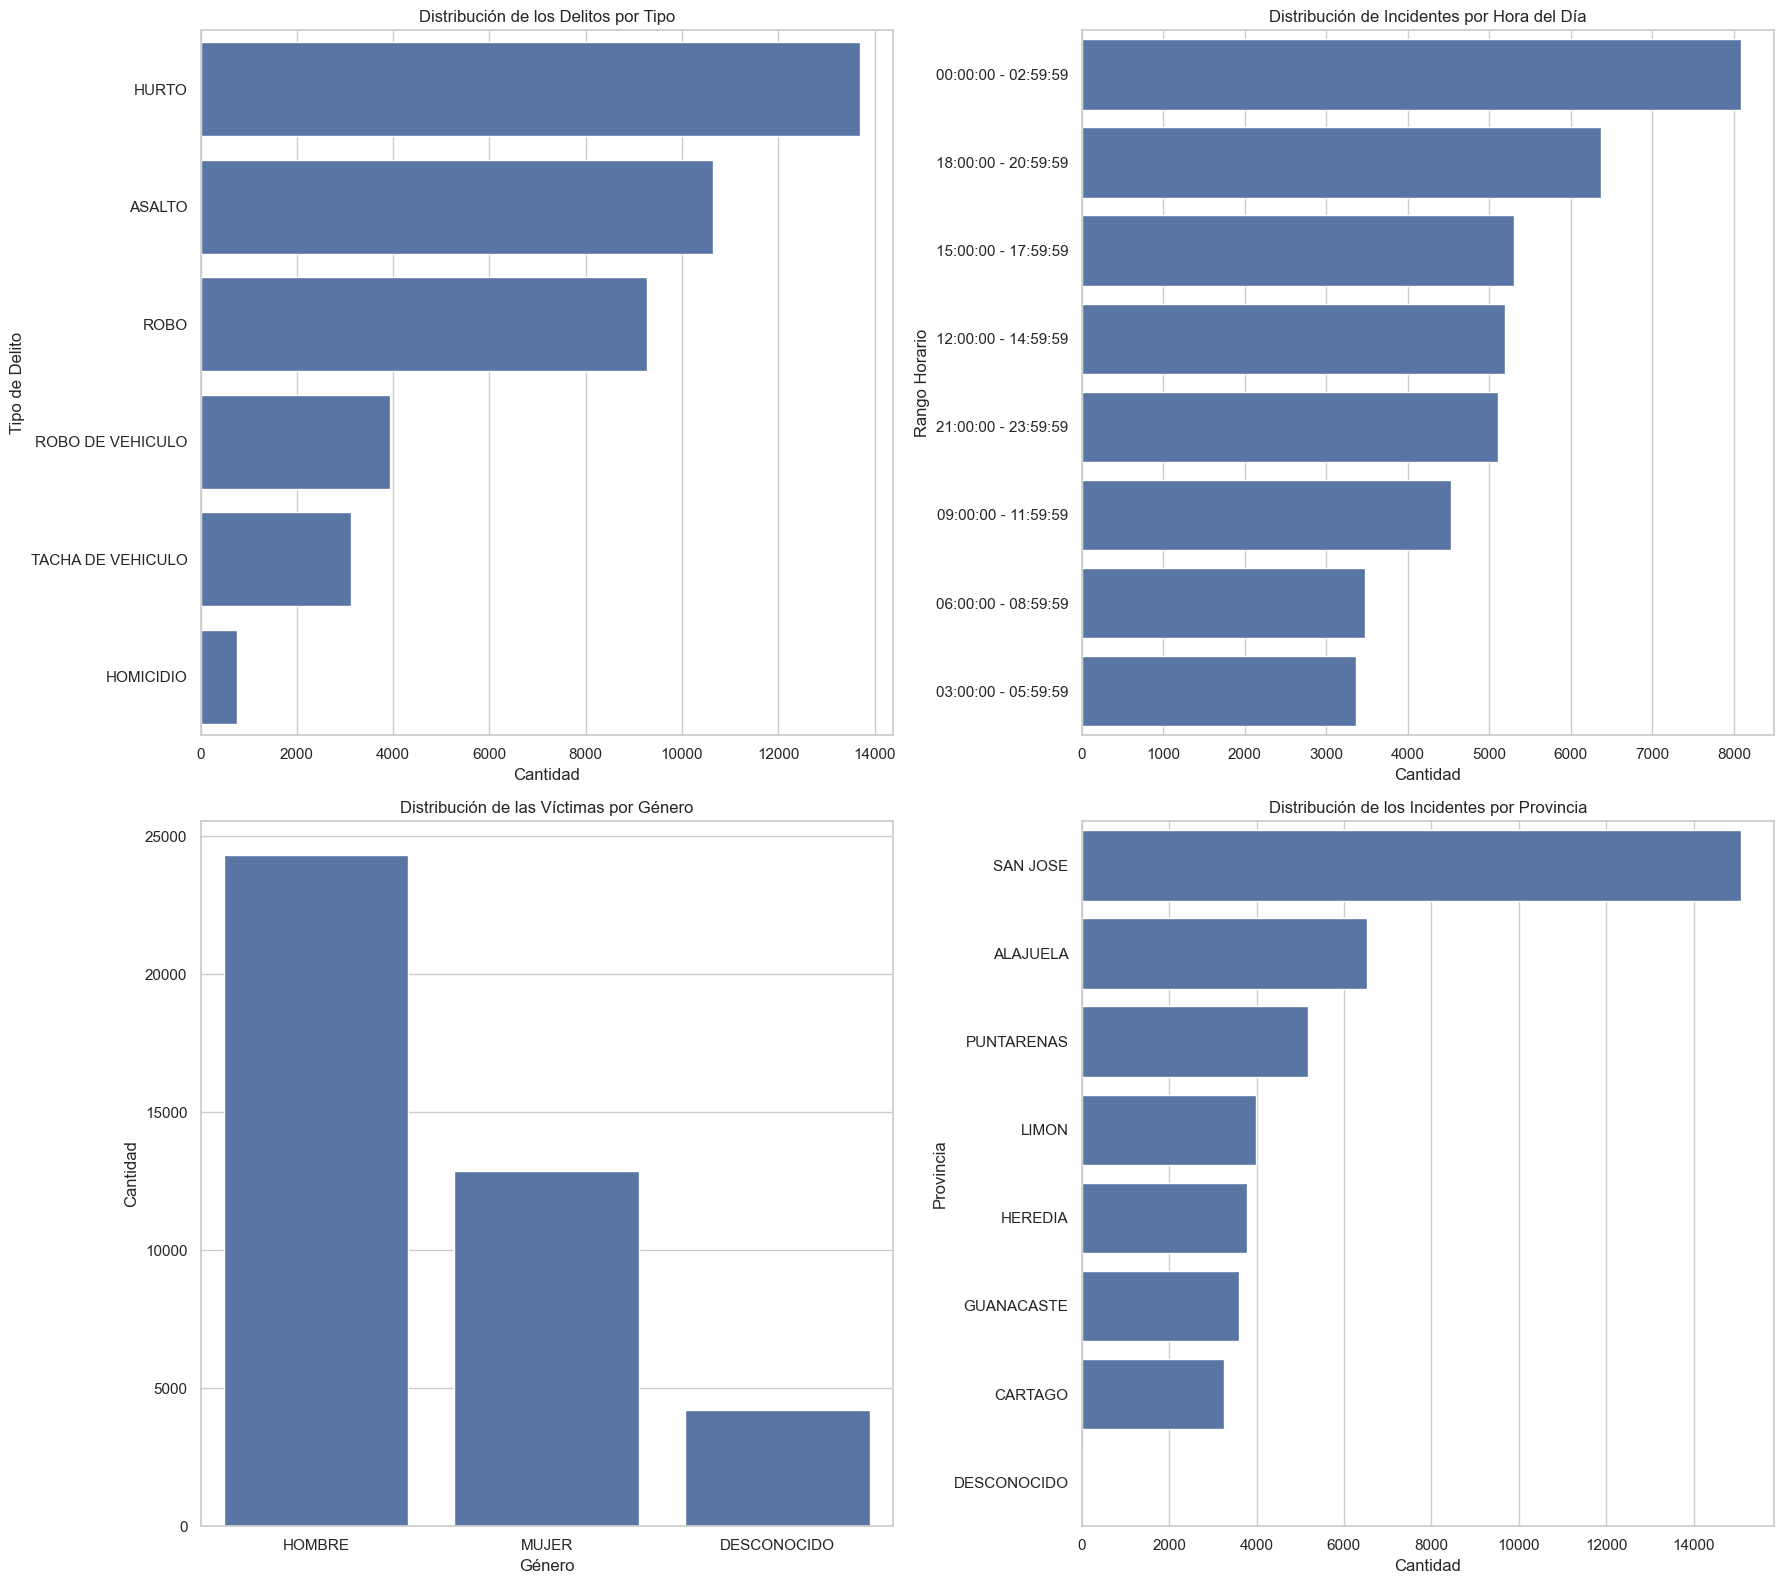

In [6]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear la figura y los ejes para los gráficos
fig, axs = plt.subplots(2, 2, figsize=(18, 16))

# Gráfico de distribución de los delitos por tipo
sns.countplot(y='Delito', data=df, ax=axs[0, 0], order=df['Delito'].value_counts().index)
axs[0, 0].set_title('Distribución de los Delitos por Tipo')
axs[0, 0].set_xlabel('Cantidad')
axs[0, 0].set_ylabel('Tipo de Delito')

# Gráfico de distribución de los incidentes por hora del día
sns.countplot(y='Hora', data=df, ax=axs[0, 1], order=df['Hora'].value_counts().index)
axs[0, 1].set_title('Distribución de Incidentes por Hora del Día')
axs[0, 1].set_xlabel('Cantidad')
axs[0, 1].set_ylabel('Rango Horario')

# Gráfico de distribución de las víctimas por género
sns.countplot(x='Genero', data=df, ax=axs[1, 0], order=df['Genero'].value_counts().index)
axs[1, 0].set_title('Distribución de las Víctimas por Género')
axs[1, 0].set_xlabel('Género')
axs[1, 0].set_ylabel('Cantidad')

# Gráfico de distribución de los incidentes por provincia
sns.countplot(y='Provincia', data=df, ax=axs[1, 1], order=df['Provincia'].value_counts().index)
axs[1, 1].set_title('Distribución de los Incidentes por Provincia')
axs[1, 1].set_xlabel('Cantidad')
axs[1, 1].set_ylabel('Provincia')

plt.tight_layout()
plt.show()


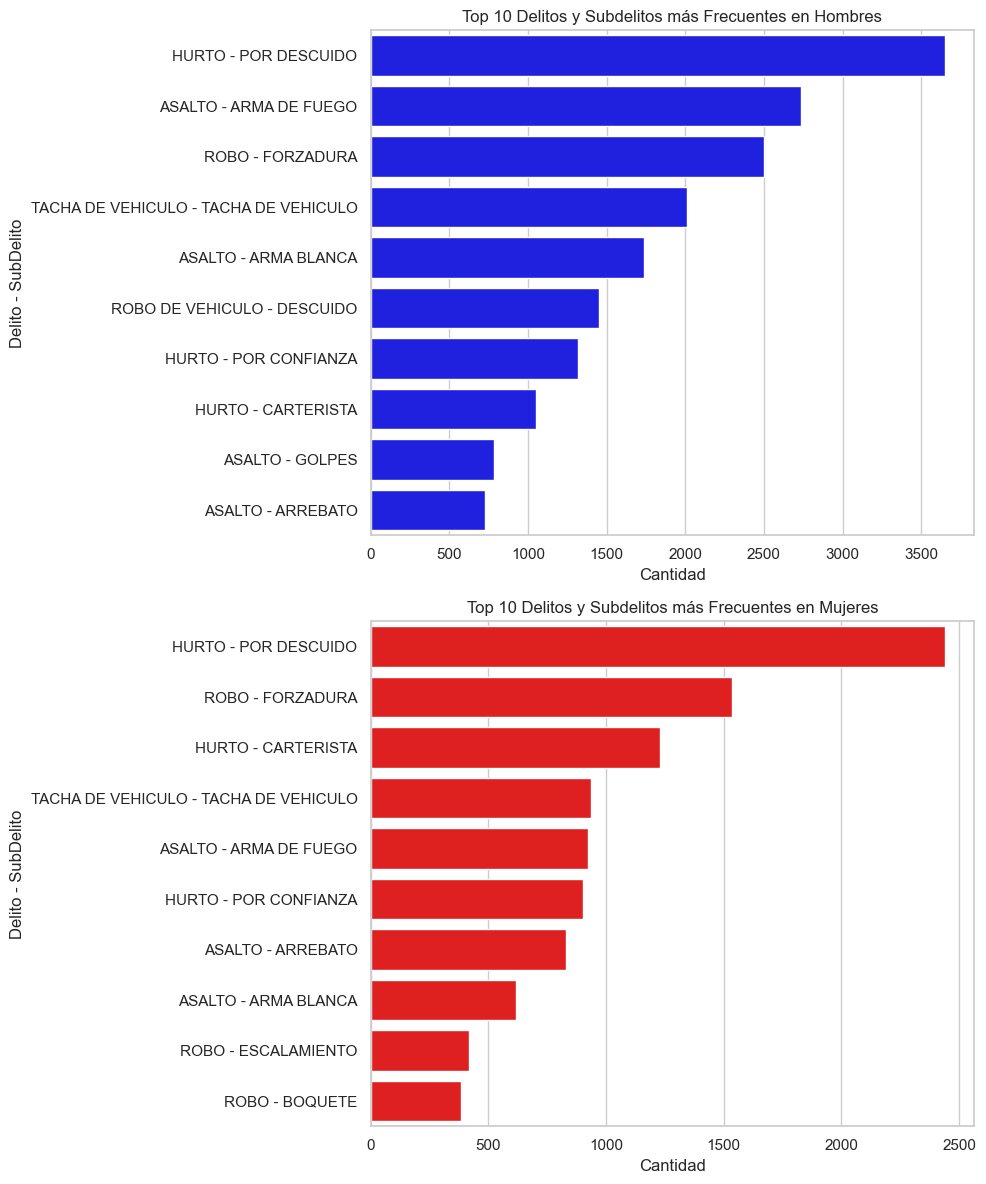

In [7]:
# Para evitar los mensajes de advertencia, vamos a utilizar el método .copy() al crear los DataFrames filtrados
# y modificar la asignación para evitar el SettingWithCopyWarning.
# También ajustaremos el uso de 'palette' según la advertencia de FutureWarning.

# Crear copias de los DataFrames filtrados para evitar SettingWithCopyWarning
df_hombres_copy = df[df['Genero'] == 'HOMBRE'].copy()
df_mujeres_copy = df[df['Genero'] == 'MUJER'].copy()

# Combinar 'Delito' y 'SubDelito' en las copias para evitar advertencias
df_hombres_copy['Delito_SubDelito'] = df_hombres_copy['Delito'] + " - " + df_hombres_copy['SubDelito']
df_mujeres_copy['Delito_SubDelito'] = df_mujeres_copy['Delito'] + " - " + df_mujeres_copy['SubDelito']

# Obtener el top 10 de 'Delito - SubDelito' más frecuentes para hombres y mujeres en las copias
top10_delito_subdelitos_hombres_copy = df_hombres_copy['Delito_SubDelito'].value_counts().head(10)
top10_delito_subdelitos_mujeres_copy = df_mujeres_copy['Delito_SubDelito'].value_counts().head(10)

# Crear la figura y los ejes para los gráficos nuevamente
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Gráfico para hombres sin FutureWarning
sns.barplot(y=top10_delito_subdelitos_hombres_copy.index, x=top10_delito_subdelitos_hombres_copy.values, ax=axs[0], color="blue")
axs[0].set_title('Top 10 Delitos y Subdelitos más Frecuentes en Hombres')
axs[0].set_xlabel('Cantidad')
axs[0].set_ylabel('Delito - SubDelito')

# Gráfico para mujeres sin FutureWarning
sns.barplot(y=top10_delito_subdelitos_mujeres_copy.index, x=top10_delito_subdelitos_mujeres_copy.values, ax=axs[1], color="red")
axs[1].set_title('Top 10 Delitos y Subdelitos más Frecuentes en Mujeres')
axs[1].set_xlabel('Cantidad')
axs[1].set_ylabel('Delito - SubDelito')

plt.tight_layout()
plt.show()